<a href="https://colab.research.google.com/github/GazalaSayyad/COVID-19-Data-analsis-and-visualization/blob/master/corona_datavis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np


oronavirus dataset on Kaggle

In [0]:
data = pd.read_csv('COVID19_open_line_list.csv')

View data

In [5]:
data.drop(['Unnamed: '+str(x) for x in range(33,45)],axis=1,inplace=True)
data.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,18.01.2020,20.01.2020,22.01.2020,NaN,yes,17.01.2020,Wuhan,NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,10.01.2020,"Luzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,15.01.2020,20.01.2020,23.01.2020,NaN,no,10.01.2020,"Yinzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,17.01.2020,20.01.2020,23.01.2020,NaN,no,NaN,NaN,NaN,contacted with confirmed case,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,07.01.2020,Wuhan,NaN,"06.01.2020 went to Wuhan, 07.01.2020 returned ...",NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Feidong County,Hefei City,Anhui,China,340122,NaN


In [6]:
len(data)

14126

In [7]:
 data.columns

Index(['ID', 'age', 'sex', 'city', 'province', 'country',
       'wuhan(0)_not_wuhan(1)', 'latitude', 'longitude', 'geo_resolution',
       'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation',
       'symptoms', 'lives_in_Wuhan', 'travel_history_dates',
       'travel_history_location', 'reported_market_exposure',
       'additional_information', 'chronic_disease_binary', 'chronic_disease',
       'source', 'sequence_available', 'outcome', 'date_death_or_discharge',
       'notes_for_discussion', 'location', 'admin3', 'admin2', 'admin1',
       'country_new', 'admin_id', 'data_moderator_initials'],
      dtype='object')

Categorical variable’s unique values 

In [8]:
data['outcome'].unique() 

array([nan, 'discharged', 'discharge', 'died', 'Discharged', '05.02.2020',
       'death',
       'Symptoms only improved with cough. Currently hospitalized for follow-up.',
       'recovered', 'stable',
       'critical condition, intubated as of 14.02.2020',
       'treated in an intensive care unit (14.02.2020)', 'severe'],
      dtype=object)

Coulmns are messy.Clean up

In [0]:
def clean(x):
    if x == 'death' or x == 'died' or x == 'Death':
        return 'death'
    elif x == 'discharged' or x=='discharge':
        return 'discharge'
    elif x == 'recovered' or x=='stable':
        return 'recovered'
    else:
        return np.nan

Another function for Age.Convert strings to integers 

In [0]:
def apply_int(x):
    try:
        y = int(x)
        return y
    except:
        return np.nan

Plot age distributions of those who died, were discharged, or recovered.

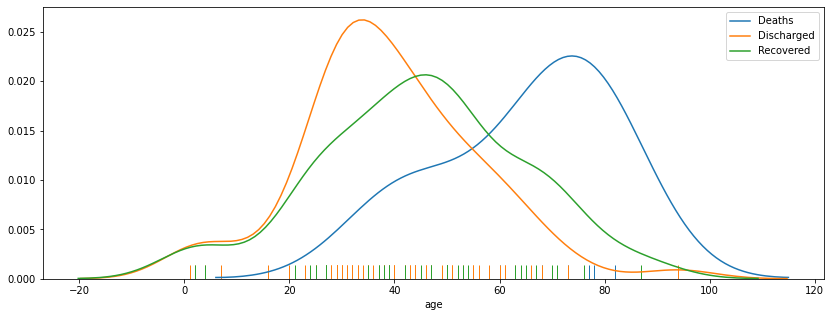

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
sns.distplot(data[data['outcome'].apply(clean)=='death']['age'].apply(apply_int),hist=False,rug=True,label='Deaths')
sns.distplot(data[data['outcome'].apply(clean)=='discharge']['age'].apply(apply_int),hist=False,rug=True,label='Discharged')
sns.distplot(data[data['outcome'].apply(clean)=='recovered']['age'].apply(apply_int),hist=False,rug=True,label='Recovered')
plt.legend()
plt.show()

 Boxplot showing the distribution,important checkpoints of a distribution (minimum, 1st & 3rd quartiles, median, maximum)

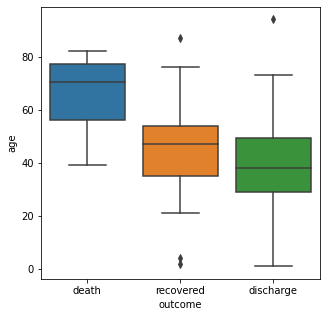

In [13]:
df1 = pd.DataFrame(data[data['outcome'].apply(clean)=='death']['age'].apply(apply_int)).assign(outcome='death')
df3 = pd.DataFrame(data[data['outcome'].apply(clean)=='discharge']['age'].apply(apply_int)).assign(outcome='discharge')
df2 = pd.DataFrame(data[data['outcome'].apply(clean)=='recovered']['age'].apply(apply_int)).assign(outcome='recovered')
cdf = pd.concat([df1, df2, df3])
plt.figure(figsize=(5,5))
sns.boxplot(x="outcome", y="age", data=cdf) 
plt.show()

 Average age for deaths

In [14]:
data[data['outcome'].apply(clean)=='death']['age'].apply(apply_int) .mean()

65.125

Coronavirus Across Countries

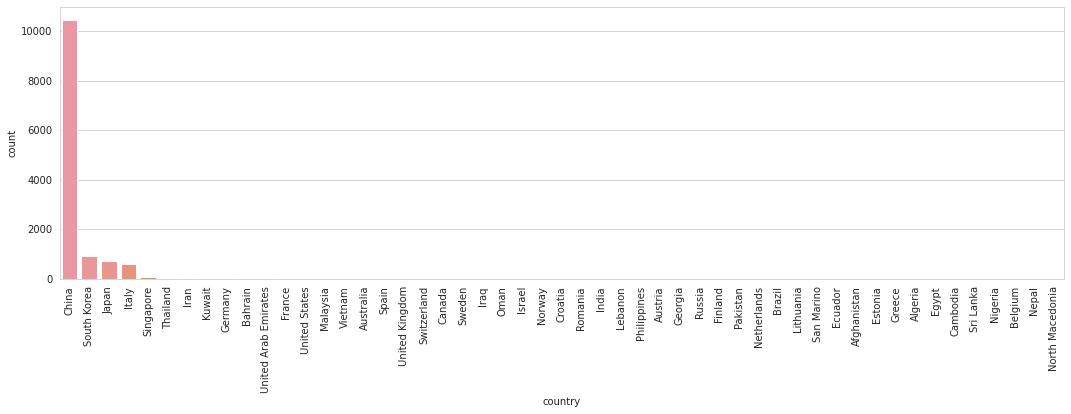

In [15]:
fig = plt.figure(figsize=(18,5))
sns.set_style('whitegrid')
sns.countplot(data['country'],order=data['country'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

China out..Checking all other countries

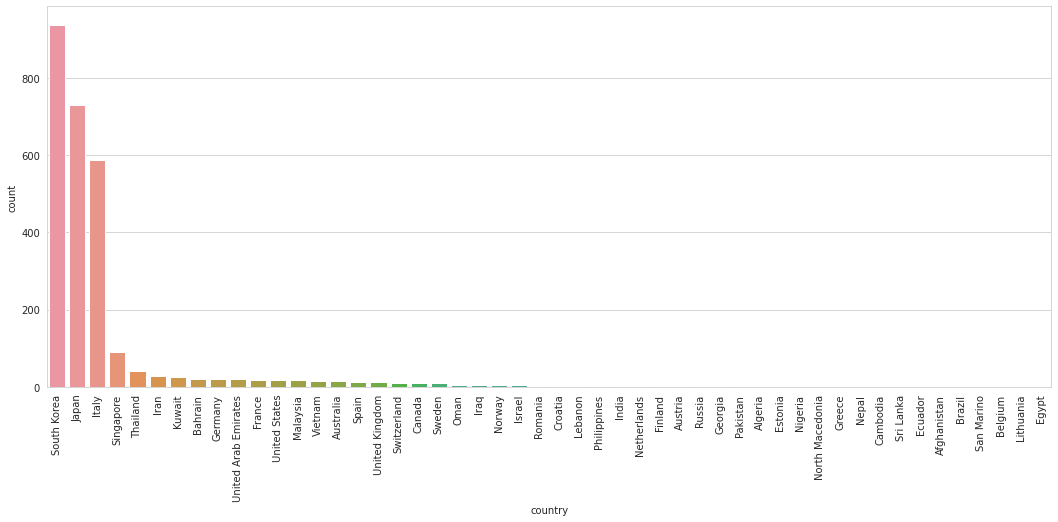

In [16]:
fig = plt.figure(figsize=(18,7))
sns.set_style('whitegrid')
sns.countplot(data[data['country'] != 'China']['country'],order=data[data['country'] != 'China']['country'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Percent of the population

Text(0.5, 0, 'country')

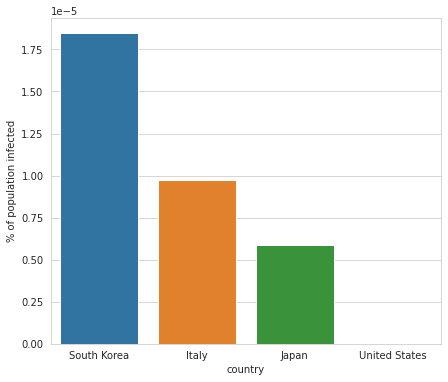

In [17]:
plt.figure(figsize=(7,6))
sns.barplot(x=['South Korea','Italy','Japan','United States'],
        
y=[938/50_800_000,588/60_430_000,731/124_800_000,17/327_170_000])
plt.ylabel("% of population infected")
plt.xlabel("country")